### Step-by-step Guide to implement ML algorithms with python ###

Chapter 2 :Classification 

## importing MNIST Dataset ##

In [1]:
##this version of the notebook is still incomplete , I have already covered the topics 
# while earning certificates online but I will return and finish this off by the 28th of August 2021
from sklearn.datasets import fetch_openml
mn = fetch_openml('mnist_784')
mn

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [2]:
x,y=mn["data"],mn["target"]
x.shape
#x contains data and y contains labels

(70000, 784)

In [3]:
y.shape

(70000,)

## grabbing and visualizing a feature ##

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

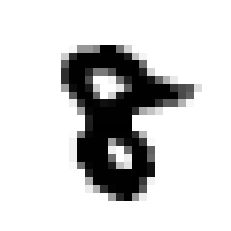

In [5]:
Digit=x[2400]
image=Digit.reshape(28,28)
plt.imshow(image,cmap=matplotlib.cm.binary , interpolation ="nearest")
plt.axis('off')
plt.show()

## splitting the dataset ##


In [6]:
x_tr,x_tes,y_tr,y_tes =x[:6000],x[6000:],y[:6000],y[6000:]

In [7]:
import numpy as np

In [8]:
myData = np.random.permutation(5000)
x_tr,y_tr=x_tr[myData],y_tr[myData]
y_tr = y_tr.astype(np.int8)
x_tr = x_tr.astype(np.int8)

Digit 6 identifier ( SGD Classifier: Stochastic Gradient Descent)

In [9]:
y_tr_6=(y_tr == 6)

In [10]:
y_tes_6=(y_tes == 6)

In [11]:
from sklearn.linear_model import SGDClassifier
mycl=SGDClassifier (random_state =42 )
mycl.fit(x_tr,y_tr_6)
x_tr.shape

(5000, 784)

In [12]:
mycl.predict(x_tr)

array([ True, False, False, ..., False, False, False])

## II- Measures of performance ##

In [13]:
# across-validation to evaluate our model
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
sf=StratifiedKFold(n_splits=2,shuffle =False ,random_state=40) #the StratifiedFold class allows us to perform stratified sampling that produces folds that contain a ration of every class

C:\Users\Aymen\.conda\envs\p36workshop\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [14]:
for train_index,test_index in sf.split(x_tr,y_tr_6):
    cl=clone(mycl)  #we clone the classifier to make predictions on the test fold . 
    x_tr_fd =x_tr[train_index]
    y_tr_fd =(y_tr_6[train_index])
    x_tes_fd =x_tr[test_index]
    y_tes_fd =(y_tr_6[test_index])
    cl.fit(x_tr_fd,y_tr_fd)
    y_p=cl.predict(x_tes_fd)
    n_correct=0
    for i in y_p:
        if i==True:
            n_correct+=1
    print(n_correct)
    print(n_correct/len(y_p)) #And finally,it will count the number of correct predictions and their ration


404
0.1616
353
0.1412


In [15]:
#k fold cross validation will divide the training set into 3 folds , 
#and then it will make predictions and evaluation on each fold.
from sklearn.model_selection import cross_val_score #accuracy_score 
###accuracy_score(y_tr_6,x_tr, mycl, normalize=True, sample_weight=None) ?
cross_val_score(mycl,x_tr,y_tr_6, cv=3 )
#prints the ration of correct predictions on all folds

array([0.84283143, 0.84403119, 0.83673469])

# classifying the classifiers at every single image in Not 6 #

In [16]:
from sklearn.base import BaseEstimator
class never6Classifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,x):
        return np.zeros((len(x),1) , dtype=bool )

 accuracy is not the best performance measure for classifiers ## IN CASE WE'RE WORKING WITH A SKEWED DATASET ##

In [17]:
never_6_cl=never6Classifier()
cross_val_score(never_6_cl,x_tr,y_tr_6,cv=3 ,scoring="accuracy")              #we are scoring 90% accuracy . Great !

array([0.90221956, 0.89922016, 0.89795918])

## Confusion matrix ##

In [18]:
from sklearn.model_selection import cross_val_predict
y_tr_pre = cross_val_predict(never_6_cl,x_tr,y_tr_6,cv=3)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_tr_6,y_tr_pre)

array([[4499,    0],
       [ 501,    0]], dtype=int64)

Precision = True Positives /( True positives +False Positives)  -----------------
Recall or Sensitivty =True Positives / (True Positives+False Negatives)

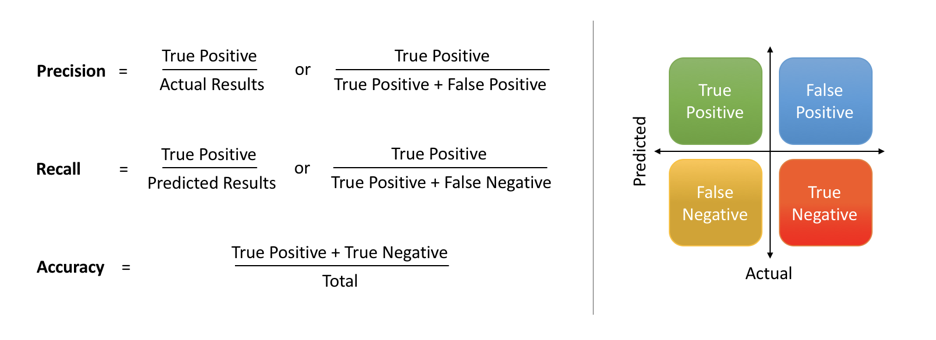

In [19]:
from IPython.display import Image
Image(filename="C:\\Users\\Aymen\\Desktop\\aaaa.png",width=800, height=200)
#<img src="C:\\Users\\Aymen\\Desktop\\aaaa.png">